# Setup


In [2]:
!apt-get update
!apt-get install tesseract-ocr
!apt-get install tesseract-ocr-por

Lendo listas de pacotes... Pronto
E: Não foi possível abrir arquivo de trava /var/lib/apt/lists/lock - open (13: Permissão negada)
E: Impossível criar acesso exclusivo ao directório /var/lib/apt/lists/
W: Problema ao remover o link do ficheiro /var/cache/apt/pkgcache.bin - RemoveCaches (13: Permissão negada)
W: Problema ao remover o link do ficheiro /var/cache/apt/srcpkgcache.bin - RemoveCaches (13: Permissão negada)
E: Não foi possível abrir arquivo de trava /var/lib/dpkg/lock-frontend - open (13: Permissão negada)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
E: Não foi possível abrir arquivo de trava /var/lib/dpkg/lock-frontend - open (13: Permissão negada)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [3]:
#!pip install tika

In [1]:
import tika
import requests
from tika import parser

# Start running the tika service
tika.initVM()

## Testando

In [2]:
!tesseract --list-langs

/bin/sh: 1: tesseract: not found


# Exercício

Baixe o conteúdo de alguns livros disponíveis no portal do MEC:
http://machado.mec.gov.br/obra-completa-lista

In [3]:
docs = {'titulo':
          ['Suplicio de uma mulher',
          'Iracema',
          'Dom Casmurro'],
        'url':
          ['http://machado.mec.gov.br/obra-completa-lista/item/download/122_460dea0cb1063340b4daeb1724cd5525',
          'http://machado.mec.gov.br/obra-completa-lista/item/download/102_172f52621103b604c77a48daed4e3407',
          'http://machado.mec.gov.br/obra-completa-lista/item/download/13_7101e1a36cda79f6c97341757dcc4d04']
}

In [4]:
import tika
import requests
from tika import parser
import numpy as np
import pandas as pd

# Start running the tika service
tika.initVM()

In [5]:
docs = ['http://machado.mec.gov.br/obra-completa-lista/item/download/28_b10fd1f9a75bcaa4573e55e677660131',
        'http://machado.mec.gov.br/obra-completa-lista/item/download/102_172f52621103b604c77a48daed4e3407',
        'http://machado.mec.gov.br/obra-completa-lista/item/download/13_7101e1a36cda79f6c97341757dcc4d04']

tempArray = []
for val in docs:
    response = requests.get(val)
    results = parser.from_buffer(response)
    tempArray.append(results)


## Questão 1
Armazene os dados acima em um pandas DataFrame, e processe as urls de cada documento utilizando o Tika. Armazene os textos extraídos em uma coluna chamada `text`.

In [6]:
#OBS os dados já estão na coluna content, não precisei criar uma coluna para isso.
df = pd.DataFrame(tempArray)


## Questão 2
Utilize a biblioteca hashedindex para criar um índice invertido dos documentos analisados.

Dica:


*   A função `textparser.word_tokenize` retorna uma Tupla, adicione o primeiro elemento dela ao indice (e.g., `term[0]`)
*   Otimize o índice setando o parâmetro `min_length=4` da função `textparser.word_tokenize`



In [7]:
#!pip install hashedindex
import hashedindex
#Limpando stopwords e pontos com Spyce
#!pip install spacy
#!spacy download pt
import os
import spacy




In [8]:
index = hashedindex.HashedIndex()
for i in df.index:
    index.add_term_occurrence(df['metadata'][i]['title'], df['content'][i] )
     
from hashedindex import textparser
tokens = list(textparser.word_tokenize(str(index.get_documents('file://E:\\obras\\romances\\ROMANCE, Dom Casmurro,1899.htm')), min_length=4))

#Limpando o texto e juntando
#juntando todos os valores, e limpando mais ainda com expressão regular
numpyText = np.array(tokens)

textTemp = ''
for val in numpyText:
    textTemp = textTemp +' '+ str(val).replace('\\n', '').replace('\\\\', '').replace('Counter({\'file://E:', '').replace('\\', '').replace('\n', '').replace("['",'').replace("']",'')


#Lipando ainda mais com spyce
#Limpando com spyce. e gerando tokens
nlp = spacy.load('pt')
doc = nlp(textTemp)
    
tokenSpacy = [word for word in doc
            if word.is_punct is False or word.is_stop is False or word.is_space is False ]

#Visualizando NER
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

In [9]:
#Realizando análise de sentimentos com TextBlob

from textblob import TextBlob
blob = TextBlob(textTemp)

#detectando lingua
blob.detect_language()

#Corrigindo sentenças
#blob.correct()

#Análise de sentimentos
blob_en = blob.translate(to='en')
blob_en.sentiment
#Mostra que é bastante positivo

Sentiment(polarity=0.07939258138770997, subjectivity=0.45301281510537417)

In [10]:
#Checando as palavras mais recorrentes.
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt') # Punkt sentence tokenizer
from nltk.probability import FreqDist

#Tokenizando com NLTK
tokenized_word=word_tokenize(textTemp)

fdist = FreqDist(tokenized_word)
fdist.most_common(10)

[nltk_data] Downloading package punkt to /home/anderson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('para', 542),
 ('como', 374),
 ('minha', 342),
 ('capitu', 341),
 ('mais', 338),
 ('dias', 192),
 ('quando', 192),
 ('tudo', 189),
 ('também', 189),
 ('capítulo', 188)]

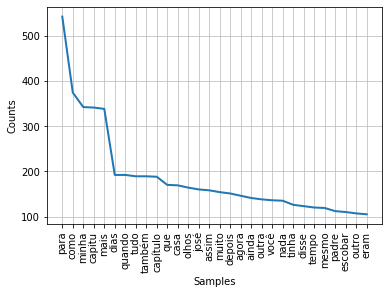

In [11]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

Quantos termos tem o seu índice?

In [12]:
print(len(list(textparser.word_tokenize(textTemp))))


37234


Quais são os termos?

In [13]:
list(textparser.word_tokenize(textTemp))

textparser.get_ngrams

<function hashedindex.textparser.get_ngrams(token_list, n=2)>

Faça uma pesquisa por personagens do livro 'Dom Casmurro', por exemplo: 'capitu', 'bento', etc.

In [14]:
index2 = hashedindex.HashedIndex()
for term in textTemp.split():
    index2.add_term_occurrence(term, 'document2.txt')
    
index2.items()

index2.get_documents('capitu')
index2.get_documents('bento')

Counter({'document2.txt': 2})